In [11]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

import matplotlib.pylab as plt
%matplotlib inline

Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [3]:
data = pd.read_csv('abalone.csv')

In [4]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [5]:
data['Sex'].replace({'F': -1, 'I': 0, 'M': 1}, inplace=True)

In [6]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [7]:
X = data.drop(['Rings'], axis=1)
y = data['Rings']

Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [8]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

scores = []
for n_trees in range(1, 51):
    regr = RandomForestRegressor(random_state=1, n_estimators=n_trees)
    scores.append(cross_val_score(regr, X, y, scoring='r2', cv=cv).mean())

Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

In [9]:
answers = [np.min(np.where(np.array(scores) > 0.52)) + 2]
print(answers)
with open("rfregr_answer1.txt", "w") as fout:
    fout.write(" ".join([str(num) for num in answers]))

[22]


Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

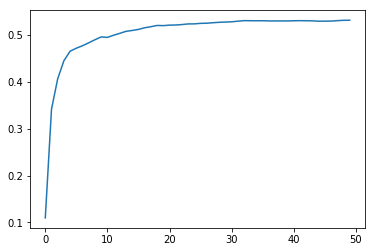

In [12]:
plt.plot(scores)